# Zadanie: Przewidywanie wieku oposów na podstawie cech morfometrycznych

**Cel:**  
W tym zadaniu mamy zbiór danych dotyczących gatunku oposów, zapisany w pliku `possum.csv`. Chcemy zbudować model regresyjny, który na podstawie wymiarów ciała i innych cech będzie przewidywał wiek osobników.

**Dane:**  
Zbiór danych zawiera następujące kolumny:

- **case**: Unikalny identyfikator obserwacji.
- **site**: Numer stanowiska (miejsce odłowu).
- **Pop**: Populacja (np. "Vic" lub inna).
- **sex**: Płeć zwierzęcia ("m" dla samca, "f" dla samicy).
- **age**: Wiek w latach (zmienna docelowa, zawiera 2 brakujące wartości).
- **hdlngth**: Długość głowy (mm).
- **skullw**: Szerokość czaszki (mm).
- **totlngth**: Całkowita długość (mm).
- **taill**: Długość ogona (mm).
- **footlgth**: Długość stopy (mm, 1 brakująca wartość).
- **earconch**: Długość małżowiny usznej (mm).
- **eye**: Wielkość oka (mm).
- **chest**: Obwód klatki piersiowej (cm).
- **belly**: Obwód brzucha (cm).

**Problem:**  
Zmienna docelowa to **age**. Niestety, w zbiorze danych znajdują się brakujące wartości (2 w kolumnie `age` oraz 1 w `footlgth`). Musimy je odpowiednio uzupełnić przed budową modelu.

**Co należy zrobić:**

1. **Wczytać dane** z pliku `possum.csv`.
2. **Zbadać dane**: sprawdzić typy zmiennych, rozkłady, brakujące wartości.
3. **Przetworzyć dane**:  
   - Poradzić sobie z brakującymi wartościami w kolumnach `age` i `footlgth`.  
   - Zakodować zmienne kategoryczne (`Pop`, `sex`) w postaci numerycznej (np. One-Hot Encoding).
   - Zastanowić się, czy potrzebne jest skalowanie cech numerycznych.
4. **Podzielić dane** na zbiór treningowy i testowy.
5. **Zbudować model regresyjny** (np. regresja liniowa, Ridge, Lasso lub inny regresor) i dopasować go do danych treningowych.
6. **Oszacować jakość modelu** na zbiorze testowym za pomocą odpowiednich miar błędu (np. MSE, MAE, R²).

**Wskazówki:**

- Możesz użyć `SimpleImputer` ze scikit-learn do uzupełniania braków (np. średnią dla cech numerycznych).
- Dla cech kategorycznych możesz użyć `OneHotEncoder`.
- Zastanów się nad pipeline’em (`Pipeline`) i `ColumnTransformerem`, aby uporządkować proces przetwarzania danych i modelowania w jednym kroku.
- Wypróbuj różne modele i porównaj ich wyniki.

**Oczekiwany rezultat:**  
Na końcu otrzymasz model, który na podstawie wymiarów ciała i informacji o populacji oraz płci possuma będzie potrafił przewidzieć wiek z pewną dokładnością. Zwróć uwagę na interpretację wyników i oceń, czy model nadaje się do praktycznego zastosowania.



In [ ]:
# !pip install scikit-learn
# !pip install --upgrade pip


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Wczytaj potrzebne biblioteki
# np. pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

# 1. Wczytaj dane z pliku possum.csv
df = pd.read_csv('data/possum.csv')
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [3]:

# 2. Wyświetl podstawowe informacje o danych (rozmiar, nagłówki, info o kolumnach)

print("Size:",df.shape)

# Informacje o danych
print("\nInformacje o zbiorze danych:")
# display(df.head())
df.info()

# Statystyki opisowe
print("\nStatystyki opisowe:")
display(df.describe(include='all'))

print('\nUnikalne wartości dla zmiennych kategorycznych:')
for col in ['Pop','sex']:
    print(f"{col}: {df[col].unique()}")


Size: (104, 14)

Informacje o zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB

Statystyki opisowe:


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104,104,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,other,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,58,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52.500000,3.625000,NaN,NaN,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,NaN,NaN,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,NaN,NaN,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,NaN,NaN,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,NaN,NaN,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,NaN,NaN,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000



Unikalne wartości dla zmiennych kategorycznych:
Pop: ['Vic' 'other']
sex: ['m' 'f']


In [4]:

# 3. Sprawdź brakujące wartości

print("\nBrakujące wartości:")
print(df.isnull().sum())

missing_info = df.isnull()
missing_locs = [(index, col) for index, row in missing_info.iterrows() for col in df.columns if row[col]]
print("\nMiejsca braków danych (indeks, kolumna):")
print(missing_locs)
print


Brakujące wartości:
case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Miejsca braków danych (indeks, kolumna):
[(40, 'footlgth'), (43, 'age'), (45, 'age')]


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [5]:
# 4. Ponieważ wiek (age) to zmienna docelowa, zdecyduj jak poradzić sobie z brakującymi wartościami w age
# (np. usunięcie wierszy z brakami w age)

# df.dropna(subset=['age'], inplace= True)

df['age'] = df['age'].fillna(df['age'].mean())
df['footlgth'] = df['footlgth'].fillna(df['footlgth'].mean())

print(df.isnull().sum())
df

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [ ]:
# -------------------------------------
# Wizualizacje
# -------------------------------------
# Rozkład zmiennej docelowej (age)
sns.histplot(df['age'], kde=True)
plt.title("Rozkład Age")
plt.show()

NameError: name 'sns' is not defined

In [7]:

# 5. Określ kolumny kategoryczne i numeryczne 
# taget chcemy przewidzieć więc nie powinien być cechami wejściowymi jest wyjściową
target = 'age'
cat_features = ['Pop','sex']
num_features = [col for col in df.columns if col not in cat_features + [target]]


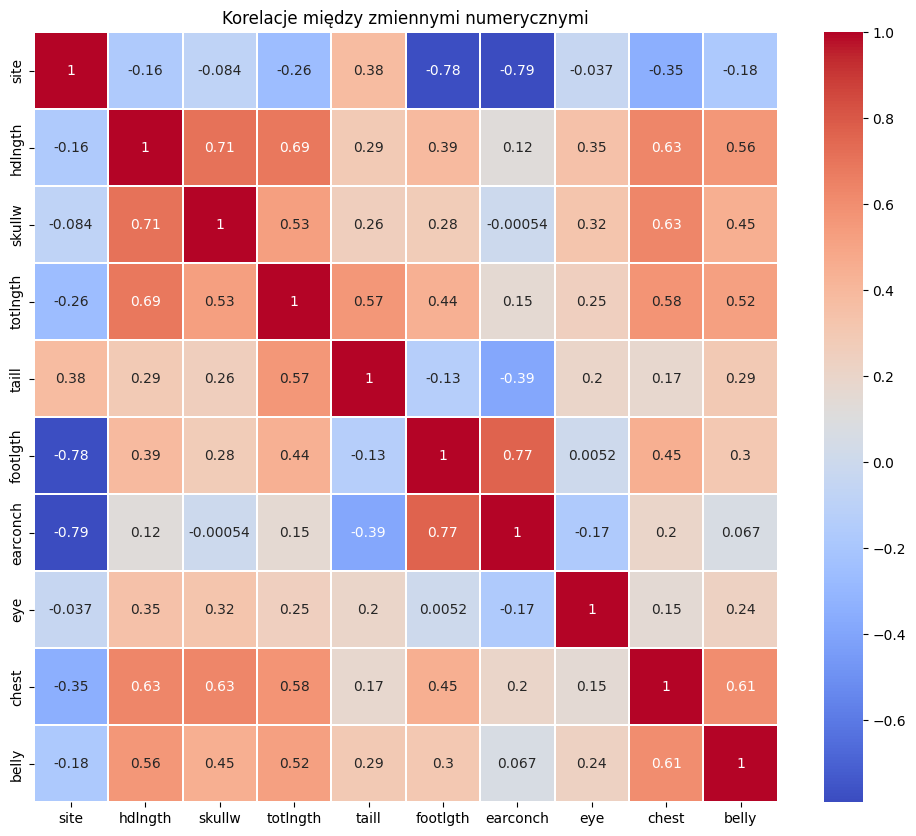

In [8]:
# Macierz korelacji numerycznych zmiennych
num_cols = [col for col in num_features if col != 'case']
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths= 0.2)
plt.title("Korelacje między zmiennymi numerycznymi")
plt.show()

In [9]:

# 6. Podziel dane na X i y (y = age), a następnie na zbiór treningowy i testowy
X = df.drop('age',axis=1)
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
X_train

,case,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
55,56,4,other,m,99.9,61.5,93.7,38.0,68.7,46.8,16.4,27.5,31.5
22,23,1,Vic,f,92.5,56.1,89.0,36.0,72.8,53.3,15.4,28.0,35.0
76,77,6,other,m,93.6,56.2,84.0,36.0,62.8,42.9,16.2,25.0,35.0
44,45,2,Vic,m,90.7,55.9,81.0,34.0,71.5,54.0,14.6,27.0,31.5
72,73,5,other,m,82.5,52.3,82.0,36.5,65.7,44.7,16.0,23.5,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,5,other,m,85.9,52.4,80.5,35.0,62.0,42.4,14.1,25.5,30.0
14,15,1,Vic,m,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0
92,93,7,other,m,89.2,54.0,82.0,38.0,63.8,44.9,12.8,24.0,31.0
51,52,3,other,m,97.6,61.0,93.5,40.0,67.9,44.3,15.8,28.5,32.5


In [11]:
# 7. Stwórz pipeline dla cech numerycznych z imputacją medianą i skalowaniem
num_pipeline = Pipeline([
   ('imputer', SimpleImputer(strategy='median')),
   ('scaler', StandardScaler())
])

In [12]:
# 8. Stwórz pipeline dla cech kategorycznych z OneHotEncoder
cat_pipeline = Pipeline([
   ('encoder', OneHotEncoder(drop='first'))
])

In [13]:
# 9. Stwórz ColumnTransformer łączący oba pipeline’y
preprocessor = ColumnTransformer([
   ('num', num_pipeline, num_features),
   ('cat', cat_pipeline, cat_features)
], remainder='drop')

In [14]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['case', 'site', 'hdlngth', 'skullw',
                                  'totlngth', 'taill', 'footlgth', 'earconch',
                                  'eye', 'chest', 'belly']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Pop', 'sex'])])

In [15]:

# 10. Zbuduj pipeline z modelem regresji liniowej i dopasuj do danych treningowych
lin_pipeline = Pipeline([
   ('preprocessing', preprocessor),
   ('model', LinearRegression())
])
lin_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['case', 'site', 'hdlngth',
                                                   'skullw', 'totlngth',
                                                   'taill', 'footlgth',
                                                   'earconch', 'eye', 'chest',
                                                   'belly']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Pop', 'sex'])])),
                ('model', LinearRegression())])

In [16]:


# 11. Dokonaj predykcji na zbiorze testowym i oblicz MSE oraz R² dla modelu liniowego
y_pred_lin = lin_pipeline.predict(X_test)
mse_lin = mean_squared_error(y_test,y_pred_lin)
r2_lin = r2_score(y_test,y_pred_lin)
print("MSE (Linear):", mse_lin)
print("R² (Linear):", r2_lin)


MSE (Linear): 4.355439811704753
R² (Linear): 0.0311752164626935


In [23]:


# 12. Przetestuj Ridge i Lasso dla różnych wartości alpha
alphas = [0.1, 1, 10,100,150]

results = []
for alpha in alphas:
    # Ridge
    ridge_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', Ridge(alpha=alpha))
    ])
    ridge_pipeline.fit(X_train, y_train)
    y_pred_ridge = ridge_pipeline.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    # Lasso
    lasso_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', Lasso(alpha=alpha, max_iter=10000))
    ])
    lasso_pipeline.fit(X_train, y_train)
    y_pred_lasso = lasso_pipeline.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    results.append({
        'alpha': alpha,
        'MSE_Ridge': mse_ridge,
        'R2_Ridge': r2_ridge,
        'MSE_Lasso': mse_lasso,
        'R2_Lasso': r2_lasso
    })


In [24]:
# 13. Wyświetl wyniki w formie tabeli (DataFrame) i narysuj wykres MSE vs alpha oraz R² vs alpha
results_df = pd.DataFrame(results)
print("\nWyniki Ridge i Lasso dla różnych alpha:")
(results_df)




Wyniki Ridge i Lasso dla różnych alpha:


,alpha,MSE_Ridge,R2_Ridge,MSE_Lasso,R2_Lasso
0,0.1,4.337308,0.035208,3.864589,0.140360
1,1.0,4.257514,0.052958,4.805722,-0.068986
2,10.0,4.041557,0.100995,4.805722,-0.068986
3,100.0,3.903842,0.131629,4.805722,-0.068986
4,150.0,3.964228,0.118196,4.805722,-0.068986


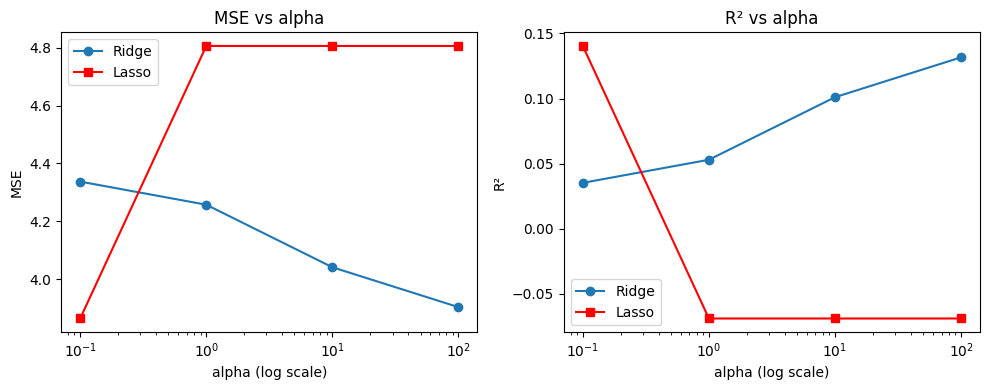

In [32]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(alphas, results_df['MSE_Ridge'], marker='o', label='Ridge')
plt.plot(alphas, results_df['MSE_Lasso'], marker='s', label='Lasso', color='red')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs alpha')
plt.legend()

plt.subplot(1,2,2)
plt.plot(alphas, results_df['R2_Ridge'], marker='o', label='Ridge')
plt.plot(alphas, results_df['R2_Lasso'], marker='s', label='Lasso', color='red')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('R²')
plt.title('R² vs alpha')
plt.legend()

plt.tight_layout()
plt.show()

14. Podsumuj wyniki w komentarzu: Która metoda działa najlepiej? Jak wpływa alpha na model?

## Ridge Regression:

MSE spada wraz ze wzrostem alpha, a R^2 rośnie co oznacza, że model Ridge zyskuje na jakości przy większej regularizacji.
Ridge działa lepiej ze wzrostem alpha.

## Lasso Regression:

Dla aplha = 0.1 model działa najlepiej. 

Gdy od alpha = 1.0 rośnie w górę:

- MSE gwałtownie rośnie do 4.81

- R² spada poniżej zera → model jest gorszy niż prosta średnia wartości

Wyniki nie zmieniają się między alpha = 1.0 i 100.0 → najprawdopodobniej Lasso wyzerowało wszystkie lub prawie wszystkie współczynniki, czyli model "nic nie przewiduje".

Lasso jest zbyt agresywne dla alpha >= 1.0 i powoduje przeuczenie przez nadmierne wyzerowanie współczynników.

## Wnioski:

- Ridge: zyskuje na sile wraz z wyższym alpha – działa lepiej przy większej regularyzacji.

- Lasso: tylko dla małego alpha (0.1) daje sensowny wynik, potem model się nic nie przewiduje.

- Najlepszy wynik całkowity: Lasso przy alpha=0.1 (R² = 0.140).



